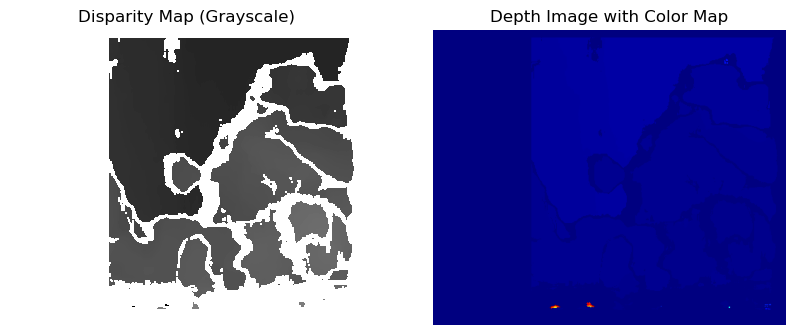

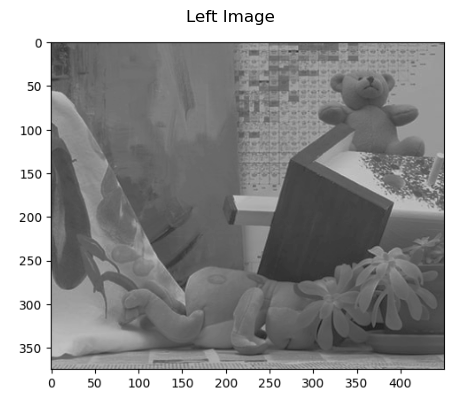

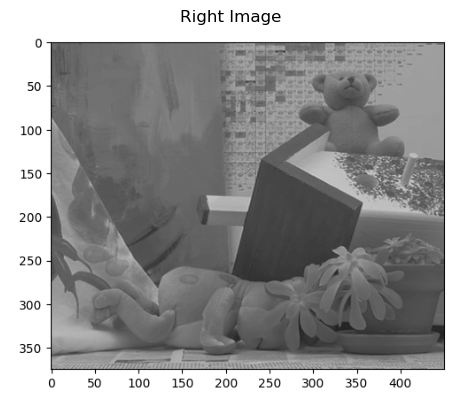

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load stereo images (left and right images)
imgL = cv2.imread(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\teddy.jpg", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\teddyl.jpg", cv2.IMREAD_GRAYSCALE)

if imgL is None or imgR is None:
    print("Error loading images.")
else:
    # Create a StereoBM object to compute disparity
    stereo = cv2.StereoBM_create(numDisparities=128, blockSize=25)

    # Compute the disparity map (dividing by 16.0 to get float values)
    disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

    # Replace invalid disparity values (<= 0) with NaN
    disparity[disparity <= 0] = np.nan

    # Stereo camera parameters
    focal_length = 150  # You may need to adjust this based on your camera setup
    baseline = 0.1      # Similarly, adjust the baseline to the real value

    # Compute depth map using the disparity values
    depth_map = (focal_length * baseline) / disparity

    # Normalize the depth map for visualization, ignoring NaN values
    depth_normalized = np.nan_to_num(depth_map, nan=0.0)  # Handle NaN for normalization
    depth_normalized = cv2.normalize(depth_normalized, None, 0, 255, cv2.NORM_MINMAX)

    # Apply a color map to visualize depth more clearly
    depth_colormap = cv2.applyColorMap(np.uint8(depth_normalized), cv2.COLORMAP_JET)

    # Save the depth map with color mapping
    cv2.imwrite('depth_colormap.png', depth_colormap)

    # Plot the disparity map (grayscale) and depth map (with color map)
    plt.figure(figsize=(10, 5))

    # Display the original disparity map (in grayscale)
    plt.subplot(1, 2, 1)
    plt.imshow(disparity, cmap='gray')
    plt.title('Disparity Map (Grayscale)')
    plt.axis('off')

    # Display the color-mapped depth image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    plt.title('Depth Image with Color Map')
    plt.axis('off')

    # Show the plots
    plt.show()

    # Optional: Display original images for reference
    plt.figure()
    plt.imshow(imgL, cmap='gray')
    plt.title('Left Image')
    plt.axis('off')

    plt.figure()
    plt.imshow(imgR, cmap='gray')
    plt.title('Right Image')
    plt.axis('off')

    plt.show()
